In [1]:
import sys
from itertools import count
from torch import autograd
from torch_geometric.utils import dense_to_sparse
import copy
from collections import defaultdict
import random
import math

sys.path.append('../../')

from src.models.gcn import *
from src.utils.datasets import *
from src.models.trainable import *
from src.attacks.greedy_gd import *

print(sys.executable)

/home/wcorcoran/anaconda3/envs/mesp/bin/python


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [5]:
model.reset_parameters()
train = Trainable(model)
train.fit(data, 200)

Epoch 0, Train Loss - 6.671708106994629, Val Loss - 3.100290298461914, Val Accuracy - 0.186
Epoch 20, Train Loss - 0.548163652420044, Val Loss - 1.2033600807189941, Val Accuracy - 0.708
Epoch 40, Train Loss - 0.1658208966255188, Val Loss - 1.355641484260559, Val Accuracy - 0.739
Epoch 60, Train Loss - 0.15073835849761963, Val Loss - 1.5122092962265015, Val Accuracy - 0.751
Epoch 80, Train Loss - 0.07637201994657516, Val Loss - 1.523621916770935, Val Accuracy - 0.74
Epoch 100, Train Loss - 0.08211574703454971, Val Loss - 1.8729023933410645, Val Accuracy - 0.736
Epoch 120, Train Loss - 0.06926743686199188, Val Loss - 1.5082697868347168, Val Accuracy - 0.755
Epoch 140, Train Loss - 0.047486960887908936, Val Loss - 1.7021061182022095, Val Accuracy - 0.753
Epoch 160, Train Loss - 0.07568424940109253, Val Loss - 1.7120453119277954, Val Accuracy - 0.759
Epoch 180, Train Loss - 0.028290942311286926, Val Loss - 1.7326385974884033, Val Accuracy - 0.746
Epoch 200, Train Loss - 0.05173956230282783

In [6]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.749
Initial Loss: 1.8118197917938232


In [ ]:
# run 5 metattacks w/ ptb of 1
amts = defaultdict(int)

for _ in range(10):
    attacker = Metattack(data, device=device)
    attacker.setup_surrogate(model,
                         labeled_nodes=data.train_mask,
                         unlabeled_nodes=data.test_mask, lambda_=0.)
    attacker.reset()
    attacker.attack(0.1)

    for edge in attacker._added_edges.keys():
        amts[edge] += 1

In [8]:
amts

defaultdict(int,
            {(57, 2410): 9,
             (49, 2432): 8,
             (21, 2411): 2,
             (4, 1591): 6,
             (7, 959): 2,
             (115, 2513): 4,
             (23, 1310): 2,
             (13, 500): 2,
             (79, 2571): 5,
             (66, 2417): 6,
             (76, 225): 2,
             (50, 2258): 2,
             (79, 1938): 2,
             (86, 2527): 3,
             (115, 1024): 7,
             (115, 986): 1,
             (29, 1793): 2,
             (19, 2593): 4,
             (38, 1648): 1,
             (82, 2299): 1,
             (37, 2255): 1,
             (115, 2551): 5,
             (86, 96): 1,
             (54, 1084): 2,
             (131, 2098): 2,
             (120, 462): 3,
             (58, 832): 3,
             (63, 2297): 5,
             (4, 2605): 3,
             (11, 2341): 1,
             (115, 545): 5,
             (130, 1048): 1,
             (60, 2533): 1,
             (32, 2396): 7,
             (54, 2699): 2,
       

In [9]:
sorted_list = sorted(amts.items(), key=lambda item: item[1], reverse=True)
sorted_keys = [key for key, value in sorted_list]

In [10]:
sorted_list

[((32, 1372), 10),
 ((32, 491), 10),
 ((57, 2410), 9),
 ((32, 2608), 9),
 ((32, 2164), 9),
 ((49, 2432), 8),
 ((32, 499), 8),
 ((32, 2604), 8),
 ((32, 2158), 8),
 ((54, 2588), 8),
 ((23, 2255), 8),
 ((115, 1024), 7),
 ((32, 2396), 7),
 ((57, 2104), 7),
 ((58, 1643), 7),
 ((58, 1418), 7),
 ((58, 198), 7),
 ((23, 625), 7),
 ((58, 2549), 7),
 ((58, 1422), 7),
 ((32, 2316), 7),
 ((32, 2649), 7),
 ((32, 2454), 7),
 ((32, 1236), 7),
 ((23, 2612), 7),
 ((23, 2142), 7),
 ((58, 2505), 7),
 ((23, 2697), 7),
 ((4, 1591), 6),
 ((66, 2417), 6),
 ((4, 313), 6),
 ((58, 1454), 6),
 ((58, 956), 6),
 ((54, 1223), 6),
 ((54, 1686), 6),
 ((61, 295), 6),
 ((23, 322), 6),
 ((58, 2672), 6),
 ((60, 890), 6),
 ((23, 2429), 6),
 ((23, 2477), 6),
 ((23, 2559), 6),
 ((116, 2692), 6),
 ((79, 2571), 5),
 ((115, 2551), 5),
 ((63, 2297), 5),
 ((115, 545), 5),
 ((27, 2541), 5),
 ((32, 106), 5),
 ((31, 32), 5),
 ((23, 1132), 5),
 ((62, 988), 5),
 ((60, 630), 5),
 ((136, 2635), 5),
 ((54, 2624), 5),
 ((54, 1364), 5),
 (

In [11]:
edges_to_add = sorted_keys

In [12]:
edges_to_add

[(32, 1372),
 (32, 491),
 (57, 2410),
 (32, 2608),
 (32, 2164),
 (49, 2432),
 (32, 499),
 (32, 2604),
 (32, 2158),
 (54, 2588),
 (23, 2255),
 (115, 1024),
 (32, 2396),
 (57, 2104),
 (58, 1643),
 (58, 1418),
 (58, 198),
 (23, 625),
 (58, 2549),
 (58, 1422),
 (32, 2316),
 (32, 2649),
 (32, 2454),
 (32, 1236),
 (23, 2612),
 (23, 2142),
 (58, 2505),
 (23, 2697),
 (4, 1591),
 (66, 2417),
 (4, 313),
 (58, 1454),
 (58, 956),
 (54, 1223),
 (54, 1686),
 (61, 295),
 (23, 322),
 (58, 2672),
 (60, 890),
 (23, 2429),
 (23, 2477),
 (23, 2559),
 (116, 2692),
 (79, 2571),
 (115, 2551),
 (63, 2297),
 (115, 545),
 (27, 2541),
 (32, 106),
 (31, 32),
 (23, 1132),
 (62, 988),
 (60, 630),
 (136, 2635),
 (54, 2624),
 (54, 1364),
 (54, 804),
 (54, 1019),
 (58, 1559),
 (58, 585),
 (358, 2618),
 (54, 926),
 (54, 2032),
 (14, 601),
 (54, 293),
 (58, 2578),
 (60, 1982),
 (29, 1387),
 (86, 1084),
 (54, 1860),
 (32, 1836),
 (32, 1501),
 (54, 697),
 (94, 508),
 (7, 2411),
 (21, 2593),
 (29, 2374),
 (10, 2193),
 (32,

In [9]:
edges_to_add = None

In [10]:
model_save_path = "multi_metattack_gcn_model.pth"
list_save_path = "multi_metattack_edges_list.pth"

In [8]:
# # save model
# torch.save(model.state_dict(), model_save_path)

# # save edges
# torch.save(edges_to_add, list_save_path)

NameError: name 'edges_to_add' is not defined

In [11]:
loaded_model_state_dict = torch.load(model_save_path)

model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)
model.load_state_dict(loaded_model_state_dict)

# Load the saved list
edges_to_add = torch.load(list_save_path)

In [13]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.749
Initial Loss: 1.8118197917938232


In [14]:
from torch_geometric.utils import dense_to_sparse, to_networkx, from_networkx
import networkx as nx

In [15]:
G = to_networkx(data, to_undirected=True)
initial_edge_count = G.number_of_edges() // 2
ptb_rate = 0.15
budget = int(ptb_rate * initial_edge_count)

In [25]:
# import sys
# import torch
# from itertools import count
# from torch_geometric.utils import dense_to_sparse, to_networkx, from_networkx
# import random
# import numpy as np
# import networkx as nx

# # Convert the graph to NetworkX for manipulation
# G = to_networkx(data, to_undirected=True)

# # Store initial edge count
# initial_edge_count = G.number_of_edges() // 2
# print('num edges: ', initial_edge_count)

# ptb_rate = 0.3

# # Degree-based Edge Addition
# budget = int(ptb_rate * initial_edge_count)  # Define the number of edges to add

# # Calculate the degree of each node
# degrees = dict(G.degree())

# def sum_degs(edge):
#     return degrees[edge[0]]+ degrees[edge[1]]

# # Group nodes by degree range (e.g., group nodes with degrees within ±1)
# degree_bins = {}
# for node, degree in degrees.items():
#     bin_key = degree // 2  # Bin nodes by ranges of 2
#     if bin_key not in degree_bins:
#         degree_bins[bin_key] = []
#     degree_bins[bin_key].append(node)

# # Generate potential edges between nodes in the same degree bin
# edges_to_add = []
# for bin_nodes in degree_bins.values():
#     if len(bin_nodes) > 1:
#         # Randomly pair nodes within the same bin
#         random.shuffle(bin_nodes)
#         for i in range(len(bin_nodes)):
#             for j in range(i + 1, len(bin_nodes)):
#                 if not G.has_edge(bin_nodes[i], bin_nodes[j]) and i != j:
#                     edges_to_add.append(((bin_nodes[i], bin_nodes[j]), sum_degs((bin_nodes[i], bin_nodes[j]))))
                    
# edges_to_add.sort(key=lambda x:-x[1])

In [16]:
print(len(edges_to_add))
print(budget)

3633
395


In [17]:
print(edges_to_add)

[(32, 1372), (32, 491), (57, 2410), (32, 2608), (32, 2164), (49, 2432), (32, 499), (32, 2604), (32, 2158), (54, 2588), (23, 2255), (115, 1024), (32, 2396), (57, 2104), (58, 1643), (58, 1418), (58, 198), (23, 625), (58, 2549), (58, 1422), (32, 2316), (32, 2649), (32, 2454), (32, 1236), (23, 2612), (23, 2142), (58, 2505), (23, 2697), (4, 1591), (66, 2417), (4, 313), (58, 1454), (58, 956), (54, 1223), (54, 1686), (61, 295), (23, 322), (58, 2672), (60, 890), (23, 2429), (23, 2477), (23, 2559), (116, 2692), (79, 2571), (115, 2551), (63, 2297), (115, 545), (27, 2541), (32, 106), (31, 32), (23, 1132), (62, 988), (60, 630), (136, 2635), (54, 2624), (54, 1364), (54, 804), (54, 1019), (58, 1559), (58, 585), (358, 2618), (54, 926), (54, 2032), (14, 601), (54, 293), (58, 2578), (60, 1982), (29, 1387), (86, 1084), (54, 1860), (32, 1836), (32, 1501), (54, 697), (94, 508), (7, 2411), (21, 2593), (29, 2374), (10, 2193), (32, 2461), (60, 587), (29, 925), (29, 451), (29, 2628), (7, 1541), (11, 135), (9,

In [18]:
def gen_weights(size):
    lst = []
    for i in range(1, size + 1):
        lst.append(1 / (10 * math.log2(i + 1)))
    return lst

gen_weights(len(edges_to_add))

[0.1,
 0.06309297535714575,
 0.05,
 0.04306765580733931,
 0.03868528072345416,
 0.03562071871080222,
 0.03333333333333333,
 0.031546487678572877,
 0.030102999566398118,
 0.02890648263178879,
 0.027894294565112988,
 0.027023815442731972,
 0.026264953503719355,
 0.025595802480981547,
 0.025,
 0.024465054211822605,
 0.023981246656813147,
 0.023540891336663827,
 0.02313782131597592,
 0.0227670248696953,
 0.022424382421757545,
 0.022106472945750376,
 0.02181042919855316,
 0.021533827903669655,
 0.021274605355336318,
 0.02103099178571525,
 0.020801459767650944,
 0.020584683246043445,
 0.020379504709050617,
 0.020184908658209984,
 0.02,
 0.019823986317056053,
 0.01965616322328226,
 0.01949590218937863,
 0.01934264036172708,
 0.019195872000656016,
 0.01905514124267734,
 0.018920035951687002,
 0.018790182470910757,
 0.018665241123894335,
 0.018544902341536888,
 0.01842888331487062,
 0.018316925091363363,
 0.018208790046993825,
 0.018104259678004022,
 0.018003132665669264,
 0.017905223175104137,

In [59]:
def binary_fn(rand, i):
    return rand < 0.05

def decreasing_fn(rand, i):
    return rand < math.exp(-math.log(i + 1))

In [53]:
def two_phase_attack_mcmc(split, rand_fn):
    dirty_data_copy = copy.copy(data)
    diff_threshold = abs(initial_loss/200)
    first_phase_edges = int(budget * split)
    second_phase_percent = ptb_rate * (1 - split) * 1/2
    print(2 * second_phase_percent)
    accuracies = []
    G = to_networkx(data, to_undirected=True)
    G_dirty = to_networkx(data, to_undirected=True)

    # run a metattack on 1 - split
    # store those edges in a dirty matrix
    # calculate loss + accuracy of dirty matrix
    
    dirty_data = from_networkx(G_dirty).to(device)
    dirty_data.x = dirty_data_copy.x 
    dirty_data.y = dirty_data_copy.y 
    dirty_data.train_mask = dirty_data_copy.train_mask
    dirty_data.test_mask = dirty_data_copy.test_mask
    
    attacker_dirty = Metattack(dirty_data, device=device)
    attacker_dirty.setup_surrogate(model,
                             labeled_nodes=dirty_data_copy.train_mask,
                             unlabeled_nodes=dirty_data_copy.test_mask, lambda_=0.)
    attacker_dirty.reset()
    attacker_dirty.attack(second_phase_percent)

    degs_dirty = defaultdict(tuple)
    
    for k, v in attacker_dirty._added_edges.items():
        degs_dirty[v] = (k, True)
        
    for k, v in attacker_dirty._removed_edges.items():
        degs_dirty[v] = (k, False)

    for _, second in degs_dirty.items():
        u, v = second[0]
        if second[1]:
            G_dirty.add_edge(u, v)
        else:
            G_dirty.remove_edge(u, v)
    
    dirty_data = from_networkx(G_dirty).to(device)
    dirty_data.x = dirty_data_copy.x 
    dirty_data.y = dirty_data_copy.y 
    dirty_data.train_mask = dirty_data_copy.train_mask
    dirty_data.test_mask = dirty_data_copy.test_mask

    initial_dirty_loss, initial_dirty_accuracy = train.test(dirty_data)

    degs_set = set([v[0] for v in degs_dirty.values()])
    
    # remove dirty edges from edges_to_ad
    data_copy = copy.copy(data)
    i, j = 0, 0 # i - number added, j - spot in list
    dirty_prev_loss, prev_loss = initial_dirty_loss, initial_loss
    while i < first_phase_edges:
        print(f"Attempt: {j}, Selected: {i}")
        j += 1
        u, v = random.choices(edges_to_add, weights=gen_weights(len(edges_to_add)), k=1)[0]
        # u, v = random.choices(edges_to_add, k=1)[0]
        if (u, v) in degs_set:
            continue
            
        hasEdge = G.has_edge(u, v)
        # u, v = edges_to_add[j]

        # clean matrix
        if hasEdge:
            G.remove_edge(u, v)
        else:
            G.add_edge(u, v)

        modified_data = from_networkx(G).to(device)
        modified_data.x = data.x 
        modified_data.y = data.y 
        modified_data.train_mask = data.train_mask
        modified_data.test_mask = data.test_mask
    
        modified_loss, modified_accuracy = train.test(modified_data)
        delta = modified_loss - initial_loss

        # dirty matrix
        if hasEdge:
            G_dirty.remove_edge(u, v)
        else:
            G_dirty.add_edge(u, v)

        dirty_data = from_networkx(G_dirty).to(device)
        dirty_data.x = dirty_data_copy.x 
        dirty_data.y = dirty_data_copy.y 
        dirty_data.train_mask = dirty_data_copy.train_mask
        dirty_data.test_mask = dirty_data_copy.test_mask
    
        dirty_loss, dirty_accuracy = train.test(dirty_data)
        dirty_delta = dirty_loss - dirty_prev_loss
        master_dirty = dirty_loss - initial_dirty_loss

        # if abs(delta) > 1/200 loss, immediately continue
        print(f"max_change: {initial_loss / 100}, master_clean_delta: {delta}, master_dirty_delta: {master_dirty}")
        # modified_loss: {modified_loss}, initial_loss: {initial_loss}, dirty_delta: {dirty_delta}")
        # consider something sublinear here
        if abs(delta) < (initial_loss / 100) and dirty_delta > 0:
            print("works, adding")
            i += 1
            dirty_prev_loss = dirty_loss
            accuracies.append(modified_loss)
        elif abs(delta) > (initial_loss / 100) or master_dirty < delta:
            if hasEdge:
                G.add_edge(u, v)
                G_dirty.add_edge(u, v)
            else:
                G.remove_edge(u, v)
                G_dirty.remove_edge(u, v)
            continue
        else:
            rnd = random.random()
            # if rnd < math.exp(-math.log(i + 1)):
            # if rnd < 0.5:
            if rand_fn(rnd, i):
                print("selected prob ltf")
                i += 1
                dirty_prev_loss = dirty_loss
                accuracies.append(modified_loss)
            else:
                print("removing edge")
                if hasEdge:
                    G.add_edge(u, v)
                    G_dirty.add_edge(u, v)
                else:
                    G.remove_edge(u, v)
                    G_dirty.remove_edge(u, v)
    
    modified_data = from_networkx(G).to(device)
    modified_data.x = data.x 
    modified_data.y = data.y 
    modified_data.train_mask = data.train_mask
    modified_data.test_mask = data.test_mask
    
    attacker = Metattack(modified_data, device=device)
    attacker.setup_surrogate(model,
                             labeled_nodes=data.train_mask,
                             unlabeled_nodes=data.test_mask, lambda_=0.)
    attacker.reset()
    attacker.attack(second_phase_percent)

    degs = defaultdict(tuple)
    
    for k, v in attacker._added_edges.items():
        degs[v] = (k, True)
        
    for k, v in attacker._removed_edges.items():
        degs[v] = (k, False)
    
    for _, second in degs.items():
        u, v = second[0]
        if second[1]:
            G.add_edge(u, v)
        else:
            G.remove_edge(u, v)
    
        modified_data = from_networkx(G).to(device)
        modified_data.x = data.x 
        modified_data.y = data.y 
        modified_data.train_mask = data.train_mask
        modified_data.test_mask = data.test_mask
    
        modified_loss, modified_accuracy = train.test(modified_data)
    
        # accuracies.append(modified_accuracy)
        accuracies.append(modified_loss)

    print(accuracies)
    return accuracies

In [54]:
splits = [0, 0.5, 0.7, 0.9]
# splits = [0.5, 0.7, 0.9]
split_dic = defaultdict(list)

In [55]:
for s in splits:
    print(s)
    split_dic[s] = two_phase_attack_mcmc(s, binary_fn)

0
0.15


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

[1.8078562021255493, 1.8078563213348389, 1.8081072568893433, 1.8081071376800537, 1.8048759698867798, 1.8032678365707397, 1.803725242614746, 1.8029580116271973, 1.8029582500457764, 1.8029582500457764, 1.8029340505599976, 1.8029340505599976, 1.8052821159362793, 1.8028374910354614, 1.8018848896026611, 1.8018848896026611, 1.8018698692321777, 1.7996968030929565, 1.7996970415115356, 1.7982374429702759, 1.8029204607009888, 1.803417444229126, 1.803402304649353, 1.801672101020813, 1.8009377717971802, 1.7982114553451538, 1.7982114553451538, 1.7982114553451538, 1.7975491285324097, 1.7975270748138428, 1.7993861436843872, 1.7983338832855225, 1.7997009754180908, 1.7996795177459717, 1.7958275079727173, 1.7940692901611328, 1.796073079109192, 1.7947942018508911, 1.8007779121398926, 1.8025622367858887, 1.8018792867660522, 1.8018794059753418, 1.8025996685028076, 1.8033384084701538, 1.8030369281768799, 1.8030368089675903, 1.802950143814087, 1.8029565811157227, 1.8029131889343262, 1.8051092624664307, 1.805

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0007176399230957031, master_dirty_delta: 0.0018616914749145508
works, adding
Attempt: 1, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0007240772247314453, master_dirty_delta: 0.0016351938247680664
removing edge
Attempt: 2, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0007175207138061523, master_dirty_delta: 0.00030863285064697266
Attempt: 3, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: -0.0027009248733520508, master_dirty_delta: -0.005325675010681152
Attempt: 4, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0007176399230957031, master_dirty_delta: 0.0016807317733764648
removing edge
Attempt: 5, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0007176399230957031, master_dirty_delta: 0.0019571781158447266
works, adding
Attempt: 6, Selected: 2
max_change: 0.01811819791793823, master_clean_delta: -0.0010039806

Peturbing graph...:   0%|          | 0/205 [00:00<?, ?it/s]

[1.812537431716919, 1.812537431716919, 1.812537431716919, 1.8124380111694336, 1.8123834133148193, 1.8123834133148193, 1.8163790702819824, 1.8163789510726929, 1.8178117275238037, 1.8186545372009277, 1.8186545372009277, 1.8186572790145874, 1.8186572790145874, 1.8190456628799438, 1.8210811614990234, 1.8257757425308228, 1.8257757425308228, 1.8257757425308228, 1.8290801048278809, 1.8291211128234863, 1.8296970129013062, 1.8298317193984985, 1.8296393156051636, 1.8296393156051636, 1.8294850587844849, 1.8297486305236816, 1.8297141790390015, 1.8297057151794434, 1.829705834388733, 1.8297016620635986, 1.8297016620635986, 1.8297016620635986, 1.8297021389007568, 1.8295676708221436, 1.8289798498153687, 1.8289799690246582, 1.8283778429031372, 1.8292886018753052, 1.8292580842971802, 1.8292580842971802, 1.8292579650878906, 1.8285917043685913, 1.8285918235778809, 1.8289445638656616, 1.8290989398956299, 1.8279417753219604, 1.8281601667404175, 1.8298866748809814, 1.829886555671692, 1.8298815488815308, 1.82

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0008221864700317383, master_dirty_delta: 0.0008220672607421875
works, adding
Attempt: 1, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0004519224166870117, master_dirty_delta: 0.0004519224166870117
removing edge
Attempt: 2, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0013835430145263672, master_dirty_delta: -8.094310760498047e-05
Attempt: 3, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0008219480514526367, master_dirty_delta: 0.0008218288421630859
Attempt: 4, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0007978677749633789, master_dirty_delta: -0.00027692317962646484
Attempt: 5, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0016537904739379883, master_dirty_delta: 0.00018858909606933594
Attempt: 6, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0008219480514526367, master_dirty_del

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

[1.812641978263855, 1.8126417398452759, 1.8173720836639404, 1.8173741102218628, 1.817373514175415, 1.8224259614944458, 1.8224260807037354, 1.8224385976791382, 1.8263834714889526, 1.8263834714889526, 1.8263733386993408, 1.8265206813812256, 1.8267223834991455, 1.8276917934417725, 1.8276921510696411, 1.8276920318603516, 1.8276921510696411, 1.8278229236602783, 1.827436923980713, 1.8274370431900024, 1.8277947902679443, 1.8293801546096802, 1.8293800354003906, 1.8294676542282104, 1.8298628330230713, 1.8298628330230713, 1.828779935836792, 1.828779935836792, 1.8287948369979858, 1.828795313835144, 1.8288482427597046, 1.8288506269454956, 1.8288450241088867, 1.8288445472717285, 1.8288496732711792, 1.8288851976394653, 1.8288851976394653, 1.8288861513137817, 1.8290343284606934, 1.829197645187378, 1.8293970823287964, 1.8293970823287964, 1.8294950723648071, 1.8299140930175781, 1.8299157619476318, 1.8299158811569214, 1.8298585414886475, 1.827745795249939, 1.8277946710586548, 1.8288328647613525, 1.82932

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.00022304058074951172, master_dirty_delta: 0.0002231597900390625
works, adding
Attempt: 1, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0002104043960571289, master_dirty_delta: 0.00020933151245117188
Attempt: 2, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.00022280216217041016, master_dirty_delta: 0.00022304058074951172
removing edge
Attempt: 3, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0006139278411865234, master_dirty_delta: 0.0006163120269775391
works, adding
Attempt: 4, Selected: 2
max_change: 0.01811819791793823, master_clean_delta: 0.0005015134811401367, master_dirty_delta: 0.0005038976669311523
removing edge
Attempt: 5, Selected: 2
max_change: 0.01811819791793823, master_clean_delta: 0.0005450248718261719, master_dirty_delta: 0.0005475282669067383
removing edge
Attempt: 6, Selected: 2
max_change: 0.01811819791793823, master_clean_delt

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

[1.8120428323745728, 1.8124337196350098, 1.8124336004257202, 1.8150584697723389, 1.815058708190918, 1.8150875568389893, 1.8157784938812256, 1.815781831741333, 1.8166955709457397, 1.8167272806167603, 1.8187775611877441, 1.8199398517608643, 1.8212952613830566, 1.821295142173767, 1.8212952613830566, 1.82129967212677, 1.82129967212677, 1.821409821510315, 1.8244315385818481, 1.8258541822433472, 1.8258541822433472, 1.8288532495498657, 1.8288557529449463, 1.8288557529449463, 1.8289358615875244, 1.828917145729065, 1.8293628692626953, 1.8293628692626953, 1.8293628692626953, 1.829490065574646, 1.8298958539962769, 1.8299260139465332, 1.8299260139465332, 1.829925775527954, 1.829846978187561, 1.829846978187561, 1.8298484086990356, 1.8298484086990356, 1.8298476934432983, 1.8298507928848267, 1.8268370628356934, 1.8268369436264038, 1.826838493347168, 1.8268381357192993, 1.8271414041519165, 1.8276029825210571, 1.8276305198669434, 1.8288979530334473, 1.828959345817566, 1.828959345817566, 1.8289593458175

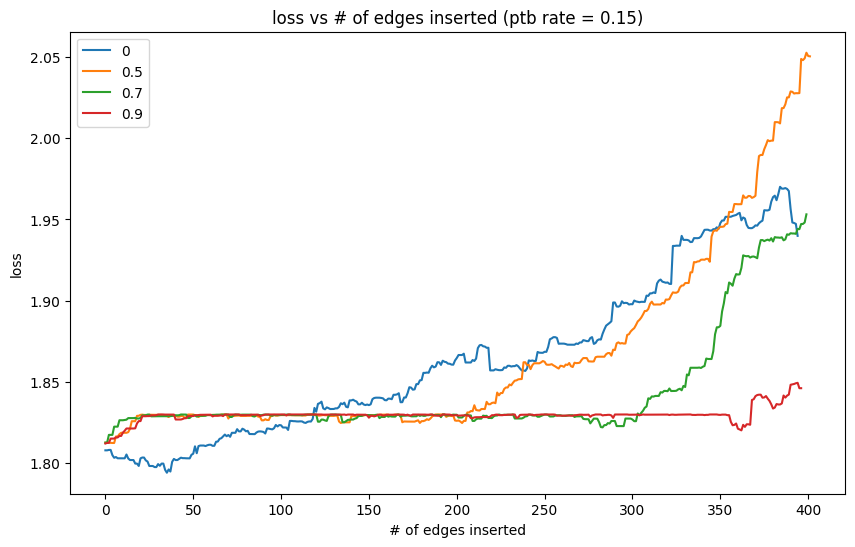

In [56]:
import matplotlib.pyplot as plt

# split_dic2 = copy.copy(split_dic)

# for label, values in split_dic2.items():
#     for i in range(len(values)):
#         split_dic2[label][i] = - abs(values[i] - initial_loss)

plt.figure(figsize=(10, 6))

# Iterate over the dictionary and plot each list
for label, values in split_dic.items():
    plt.plot(values, label=str(label))

plt.xlabel('# of edges inserted')
plt.ylabel('loss')
plt.title('loss vs # of edges inserted (ptb rate = 0.15)')
plt.legend()

plt.show()

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [60]:
splits = [0, 0.5, 0.7, 0.9]
# splits = [0.5, 0.7, 0.9]
split_dic_decreasing = defaultdict(list)

In [61]:
for s in splits:
    print(s)
    split_dic_decreasing[s] = two_phase_attack_mcmc(s, decreasing_fn)

0
0.15


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

[1.8118199110031128, 1.8078563213348389, 1.8078495264053345, 1.806112289428711, 1.8040086030960083, 1.8044657707214355, 1.8020563125610352, 1.802056074142456, 1.8042327165603638, 1.801788091659546, 1.80003023147583, 1.801973581314087, 1.8034640550613403, 1.8034640550613403, 1.8010791540145874, 1.7970373630523682, 1.7971583604812622, 1.7971580028533936, 1.7972900867462158, 1.7975080013275146, 1.7973453998565674, 1.7951730489730835, 1.7958215475082397, 1.7956489324569702, 1.7956489324569702, 1.7956386804580688, 1.794904351234436, 1.8009611368179321, 1.8012157678604126, 1.8030000925064087, 1.8057408332824707, 1.8071078062057495, 1.8103432655334473, 1.8103585243225098, 1.8095061779022217, 1.8105132579803467, 1.8105132579803467, 1.8102108240127563, 1.8095279932022095, 1.809687614440918, 1.8093162775039673, 1.805983066558838, 1.8139910697937012, 1.8139879703521729, 1.8147083520889282, 1.8147014379501343, 1.8147013187408447, 1.8150625228881836, 1.8150882720947266, 1.8138601779937744, 1.814905

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -0.0004495382308959961
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -1.1920928955078125e-07, master_dirty_delta: 0.0
selected prob ltf
Attempt: 3, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -0.00012373924255371094
Attempt: 4, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: -0.003418445587158203, master_dirty_delta: -2.8252601623535156e-05
selected prob ltf
Attempt: 5, Selected: 2
max_change: 0.01811819791793823, master_clean_delta: -0.0034188032150268555, master_dirty_delta: -2.8252601623535156e-05
selected prob ltf
Attempt: 6, Selected: 3
max_change: 0.01811819791793823, master_clean_delta: -0.006082892417907715, master_dirty_delta: -0.0015136003494262695
removing edge
Attempt: 7, Selected: 3
max_change: 0.01811819791793823, mast

Peturbing graph...:   0%|          | 0/205 [00:00<?, ?it/s]

[1.8118196725845337, 1.808401346206665, 1.8084009885787964, 1.8083455562591553, 1.8083453178405762, 1.8116158246994019, 1.8116158246994019, 1.8128248453140259, 1.8128248453140259, 1.8155121803283691, 1.8155122995376587, 1.815512776374817, 1.8155128955841064, 1.8171312808990479, 1.8171314001083374, 1.8171628713607788, 1.8170673847198486, 1.8171043395996094, 1.8171043395996094, 1.817106008529663, 1.821554183959961, 1.8215718269348145, 1.8215641975402832, 1.8218971490859985, 1.8219157457351685, 1.8257131576538086, 1.825714349746704, 1.8256925344467163, 1.823411226272583, 1.823411464691162, 1.8233890533447266, 1.8235036134719849, 1.8233146667480469, 1.8235445022583008, 1.823560357093811, 1.8247815370559692, 1.8247294425964355, 1.82491934299469, 1.8248074054718018, 1.8250386714935303, 1.8258719444274902, 1.8255479335784912, 1.8255037069320679, 1.8276160955429077, 1.8276420831680298, 1.8276420831680298, 1.8278257846832275, 1.8290945291519165, 1.8298351764678955, 1.8298931121826172, 1.8261682

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.0007777214050292969, master_dirty_delta: -0.0014209747314453125
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.823902130126953e-05, master_dirty_delta: 0.00013184547424316406
works, adding
Attempt: 2, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: -0.001606583595275879, master_dirty_delta: -0.0014946460723876953
selected prob ltf
Attempt: 3, Selected: 2
max_change: 0.01811819791793823, master_clean_delta: 0.0013730525970458984, master_dirty_delta: 0.0025980472564697266
works, adding
Attempt: 4, Selected: 3
max_change: 0.01811819791793823, master_clean_delta: 0.0015937089920043945, master_dirty_delta: 0.002025127410888672
selected prob ltf
Attempt: 5, Selected: 4
max_change: 0.01811819791793823, master_clean_delta: 0.0015937089920043945, master_dirty_delta: 0.002025127410888672
removing edge
Attempt: 6, Selected: 4
max_change: 0.01811819791793823, master_clea

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

[1.8118380308151245, 1.8102132081985474, 1.8131928443908691, 1.8134135007858276, 1.8134214878082275, 1.813421368598938, 1.8134400844573975, 1.8134454488754272, 1.8134537935256958, 1.8134537935256958, 1.8135340213775635, 1.8135336637496948, 1.8135342597961426, 1.8137303590774536, 1.8138693571090698, 1.8139654397964478, 1.8139654397964478, 1.8097896575927734, 1.8179850578308105, 1.8191707134246826, 1.8231157064437866, 1.8228305578231812, 1.8226591348648071, 1.8237546682357788, 1.82460355758667, 1.8292255401611328, 1.8292255401611328, 1.829626202583313, 1.829626441001892, 1.8297961950302124, 1.8297964334487915, 1.8297964334487915, 1.8297953605651855, 1.8298076391220093, 1.8293242454528809, 1.8291105031967163, 1.8298232555389404, 1.829828143119812, 1.829824447631836, 1.8298232555389404, 1.8298232555389404, 1.829823613166809, 1.8297067880630493, 1.8294522762298584, 1.829452395439148, 1.829468846321106, 1.829249382019043, 1.8291054964065552, 1.8291881084442139, 1.829188346862793, 1.829188585

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0014979839324951172, master_dirty_delta: 0.0014979839324951172
works, adding
Attempt: 1, Selected: 1
max_change: 0.01811819791793823, master_clean_delta: 0.0014979839324951172, master_dirty_delta: 0.002528548240661621
works, adding
Attempt: 2, Selected: 2
max_change: 0.01811819791793823, master_clean_delta: -0.0006748437881469727, master_dirty_delta: 0.0018935203552246094
removing edge
Attempt: 3, Selected: 2
max_change: 0.01811819791793823, master_clean_delta: -0.0033911466598510742, master_dirty_delta: -0.0023605823516845703
selected prob ltf
Attempt: 4, Selected: 3
max_change: 0.01811819791793823, master_clean_delta: -0.0019097328186035156, master_dirty_delta: -0.0008794069290161133
works, adding
Attempt: 5, Selected: 4
max_change: 0.01811819791793823, master_clean_delta: -0.001909017562866211, master_dirty_delta: -0.0008782148361206055
works, adding
Attempt: 6, Selected: 5
max_change: 0.01811819791793823

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

[1.8133177757263184, 1.8133177757263184, 1.8084286451339722, 1.8099100589752197, 1.809910774230957, 1.8102437257766724, 1.8102443218231201, 1.817997694015503, 1.8221594095230103, 1.822159767150879, 1.822159767150879, 1.8221595287322998, 1.8252856731414795, 1.825314998626709, 1.8277193307876587, 1.8293851613998413, 1.8294745683670044, 1.8294745683670044, 1.8294748067855835, 1.829621434211731, 1.8297938108444214, 1.8297938108444214, 1.8297947645187378, 1.8297947645187378, 1.829795479774475, 1.8298585414886475, 1.8298585414886475, 1.829860806465149, 1.8298618793487549, 1.8298617601394653, 1.8296200037002563, 1.829677700996399, 1.8296775817871094, 1.829662799835205, 1.829662799835205, 1.8294943571090698, 1.8294943571090698, 1.829654574394226, 1.8297597169876099, 1.8297595977783203, 1.8297432661056519, 1.8297432661056519, 1.8297432661056519, 1.8297053575515747, 1.8297303915023804, 1.8297675848007202, 1.8298649787902832, 1.8298673629760742, 1.829527735710144, 1.8298535346984863, 1.8298536539

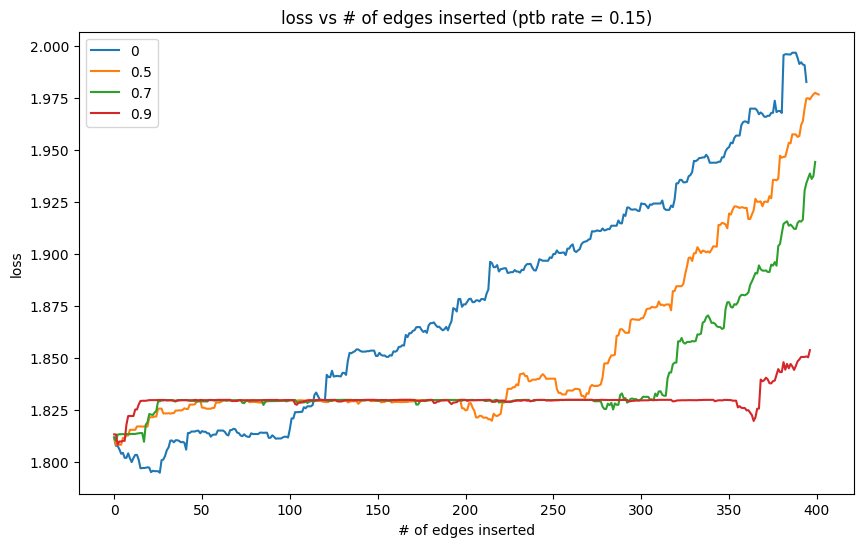

In [62]:


# split_dic2 = copy.copy(split_dic)

# for label, values in split_dic2.items():
#     for i in range(len(values)):
#         split_dic2[label][i] = - abs(values[i] - initial_loss)

plt.figure(figsize=(10, 6))

# Iterate over the dictionary and plot each list
for label, values in split_dic_decreasing.items():
    plt.plot(values, label=str(label))

plt.xlabel('# of edges inserted')
plt.ylabel('loss')
plt.title('loss vs # of edges inserted (ptb rate = 0.15)')
plt.legend()

plt.show()

In [64]:
def two_phase_attack_mcmc_gradual(split, rand_fn):
    dirty_data_copy = copy.copy(data)
    diff_threshold = abs(initial_loss/200)
    first_phase_edges = int(budget * split)
    second_phase_percent = ptb_rate * (1 - split) * 1/2
    print(2 * second_phase_percent)
    accuracies = []
    G = to_networkx(data, to_undirected=True)
    G_dirty = to_networkx(data, to_undirected=True)

    # run a metattack on 1 - split
    # store those edges in a dirty matrix
    # calculate loss + accuracy of dirty matrix
    
    dirty_data = from_networkx(G_dirty).to(device)
    dirty_data.x = dirty_data_copy.x 
    dirty_data.y = dirty_data_copy.y 
    dirty_data.train_mask = dirty_data_copy.train_mask
    dirty_data.test_mask = dirty_data_copy.test_mask
    
    attacker_dirty = Metattack(dirty_data, device=device)
    attacker_dirty.setup_surrogate(model,
                             labeled_nodes=dirty_data_copy.train_mask,
                             unlabeled_nodes=dirty_data_copy.test_mask, lambda_=0.)
    attacker_dirty.reset()
    attacker_dirty.attack(second_phase_percent)

    degs_dirty = defaultdict(tuple)
    
    for k, v in attacker_dirty._added_edges.items():
        degs_dirty[v] = (k, True)
        
    for k, v in attacker_dirty._removed_edges.items():
        degs_dirty[v] = (k, False)

    for _, second in degs_dirty.items():
        u, v = second[0]
        if second[1]:
            G_dirty.add_edge(u, v)
        else:
            G_dirty.remove_edge(u, v)
    
    dirty_data = from_networkx(G_dirty).to(device)
    dirty_data.x = dirty_data_copy.x 
    dirty_data.y = dirty_data_copy.y 
    dirty_data.train_mask = dirty_data_copy.train_mask
    dirty_data.test_mask = dirty_data_copy.test_mask

    initial_dirty_loss, initial_dirty_accuracy = train.test(dirty_data)

    degs_set = set([v[0] for v in degs_dirty.values()])
    
    # remove dirty edges from edges_to_ad
    data_copy = copy.copy(data)
    i, j = 0, 0 # i - number added, j - spot in list
    dirty_prev_loss, prev_loss = initial_dirty_loss, initial_loss
    while i < first_phase_edges:
        print(f"Attempt: {j}, Selected: {i}")
        j += 1
        u, v = random.choices(edges_to_add, weights=gen_weights(len(edges_to_add)), k=1)[0]
        # u, v = random.choices(edges_to_add, k=1)[0]
        if (u, v) in degs_set:
            continue
            
        hasEdge = G.has_edge(u, v)
        # u, v = edges_to_add[j]

        # clean matrix
        if hasEdge:
            G.remove_edge(u, v)
        else:
            G.add_edge(u, v)

        modified_data = from_networkx(G).to(device)
        modified_data.x = data.x 
        modified_data.y = data.y 
        modified_data.train_mask = data.train_mask
        modified_data.test_mask = data.test_mask
    
        modified_loss, modified_accuracy = train.test(modified_data)
        delta = modified_loss - initial_loss

        # dirty matrix
        if hasEdge:
            G_dirty.remove_edge(u, v)
        else:
            G_dirty.add_edge(u, v)

        dirty_data = from_networkx(G_dirty).to(device)
        dirty_data.x = dirty_data_copy.x 
        dirty_data.y = dirty_data_copy.y 
        dirty_data.train_mask = dirty_data_copy.train_mask
        dirty_data.test_mask = dirty_data_copy.test_mask
    
        dirty_loss, dirty_accuracy = train.test(dirty_data)
        dirty_delta = dirty_loss - dirty_prev_loss
        master_dirty = dirty_loss - initial_dirty_loss

        # if abs(delta) > 1/200 loss, immediately continue
        print(f"max_change: {initial_loss / 100}, master_clean_delta: {delta}, master_dirty_delta: {master_dirty}")
        # modified_loss: {modified_loss}, initial_loss: {initial_loss}, dirty_delta: {dirty_delta}")
        # consider something sublinear here
        if abs(delta) < ((i * initial_loss) / (first_phase_edges * 100)) and dirty_delta > 0:
            print("works, adding")
            i += 1
            dirty_prev_loss = dirty_loss
            accuracies.append(modified_loss)
        elif abs(delta) > ((i * initial_loss) / (first_phase_edges * 100)) or master_dirty < delta:
            if hasEdge:
                G.add_edge(u, v)
                G_dirty.add_edge(u, v)
            else:
                G.remove_edge(u, v)
                G_dirty.remove_edge(u, v)
            continue
        else:
            rnd = random.random()
            # if rnd < math.exp(-math.log(i + 1)):
            # if rnd < 0.5:
            if rand_fn(rnd, i):
                print("selected prob ltf")
                i += 1
                dirty_prev_loss = dirty_loss
                accuracies.append(modified_loss)
            else:
                print("removing edge")
                if hasEdge:
                    G.add_edge(u, v)
                    G_dirty.add_edge(u, v)
                else:
                    G.remove_edge(u, v)
                    G_dirty.remove_edge(u, v)
    
    modified_data = from_networkx(G).to(device)
    modified_data.x = data.x 
    modified_data.y = data.y 
    modified_data.train_mask = data.train_mask
    modified_data.test_mask = data.test_mask
    
    attacker = Metattack(modified_data, device=device)
    attacker.setup_surrogate(model,
                             labeled_nodes=data.train_mask,
                             unlabeled_nodes=data.test_mask, lambda_=0.)
    attacker.reset()
    attacker.attack(second_phase_percent)

    degs = defaultdict(tuple)
    
    for k, v in attacker._added_edges.items():
        degs[v] = (k, True)
        
    for k, v in attacker._removed_edges.items():
        degs[v] = (k, False)
    
    for _, second in degs.items():
        u, v = second[0]
        if second[1]:
            G.add_edge(u, v)
        else:
            G.remove_edge(u, v)
    
        modified_data = from_networkx(G).to(device)
        modified_data.x = data.x 
        modified_data.y = data.y 
        modified_data.train_mask = data.train_mask
        modified_data.test_mask = data.test_mask
    
        modified_loss, modified_accuracy = train.test(modified_data)
    
        # accuracies.append(modified_accuracy)
        accuracies.append(modified_loss)

    print(accuracies)
    return accuracies

In [65]:
splits = [0, 0.5, 0.7, 0.9]
# splits = [0.5, 0.7, 0.9]
split_dic_decreasing_gradual = defaultdict(list)

In [66]:
for s in splits:
    print(s)
    split_dic_decreasing_gradual[s] = two_phase_attack_mcmc_gradual(s, decreasing_fn)

0
0.15


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

[1.8078563213348389, 1.8046321868896484, 1.803895115852356, 1.8021599054336548, 1.8024110794067383, 1.8028682470321655, 1.80367910861969, 1.804312825202942, 1.8093012571334839, 1.8093012571334839, 1.8092435598373413, 1.8052016496658325, 1.8027570247650146, 1.8027570247650146, 1.802756905555725, 1.8027849197387695, 1.7989329099655151, 1.7989081144332886, 1.8021804094314575, 1.802410364151001, 1.8016324043273926, 1.8016330003738403, 1.8048820495605469, 1.807303547859192, 1.8085154294967651, 1.81324303150177, 1.81324303150177, 1.8161959648132324, 1.8167511224746704, 1.8192932605743408, 1.8188450336456299, 1.8184340000152588, 1.8190292119979858, 1.8159151077270508, 1.8211690187454224, 1.820684790611267, 1.821065068244934, 1.8206934928894043, 1.8224778175354004, 1.8242645263671875, 1.828510046005249, 1.8281149864196777, 1.828175663948059, 1.8282620906829834, 1.8255358934402466, 1.8242570161819458, 1.8241685628890991, 1.8305343389511108, 1.8305344581604004, 1.8312917947769165, 1.835342049598

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.000803828239440918, master_dirty_delta: 0.0009921789169311523
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -0.001394510269165039
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0014590024948120117
Attempt: 4, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0007721185684204102, master_dirty_delta: -0.0004413127899169922
Attempt: 5, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.001303553581237793
Attempt: 6, Selected: 0
Attempt: 7, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 8, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_d

Peturbing graph...:   0%|          | 0/205 [00:00<?, ?it/s]

[1.8118197917938232, 1.8118196725845337, 1.8118342161178589, 1.8118342161178589, 1.8118342161178589, 1.8118342161178589, 1.8118342161178589, 1.8118342161178589, 1.8118342161178589, 1.8116871118545532, 1.812658667564392, 1.8126585483551025, 1.8129174709320068, 1.8129186630249023, 1.812918782234192, 1.8129189014434814, 1.812918782234192, 1.8129204511642456, 1.812921166419983, 1.8129559755325317, 1.8129637241363525, 1.8129651546478271, 1.8124547004699707, 1.8126381635665894, 1.8126381635665894, 1.8126379251480103, 1.8137584924697876, 1.8137584924697876, 1.8137584924697876, 1.8137584924697876, 1.8142974376678467, 1.81429922580719, 1.8143537044525146, 1.8143717050552368, 1.8143718242645264, 1.8142485618591309, 1.814585566520691, 1.814585566520691, 1.8145865201950073, 1.8145865201950073, 1.815194845199585, 1.8140718936920166, 1.814009666442871, 1.8140095472335815, 1.8142454624176025, 1.8142286539077759, 1.8142285346984863, 1.815077304840088, 1.815088152885437, 1.8150869607925415, 1.815189719

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 5.7220458984375e-06, master_dirty_delta: 5.364418029785156e-06
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.0010503530502319336, master_dirty_delta: -0.0010349750518798828
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 2.384185791015625e-07
Attempt: 3, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 8.344650268554688e-07, master_dirty_delta: 8.344650268554688e-07
Attempt: 4, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0024558305740356445, master_dirty_delta: 0.0014079809188842773
Attempt: 5, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0017915964126586914
Attempt: 6, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -2.396106719970703e-05, master_dirty_delta: -0.0006769895553588867
At

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

[1.8118197917938232, 1.8118199110031128, 1.8118197917938232, 1.811820149421692, 1.811820149421692, 1.8118200302124023, 1.8118224143981934, 1.8118224143981934, 1.8120150566101074, 1.8120150566101074, 1.8120157718658447, 1.8120509386062622, 1.8120509386062622, 1.8120509386062622, 1.8122373819351196, 1.8122373819351196, 1.812246561050415, 1.8122466802597046, 1.8129960298538208, 1.812996506690979, 1.8129984140396118, 1.8129984140396118, 1.8130013942718506, 1.813007116317749, 1.8107144832611084, 1.8109850883483887, 1.8107315301895142, 1.81272292137146, 1.8127232789993286, 1.8127232789993286, 1.812723159790039, 1.8126105070114136, 1.8125760555267334, 1.8125760555267334, 1.8127989768981934, 1.8128160238265991, 1.8128159046173096, 1.8128153085708618, 1.8127754926681519, 1.8127754926681519, 1.8127245903015137, 1.8134727478027344, 1.8135960102081299, 1.8135838508605957, 1.8137168884277344, 1.8137261867523193, 1.8137269020080566, 1.8137270212173462, 1.8143928050994873, 1.8143929243087769, 1.81439

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.006020665168762207, master_dirty_delta: 0.006020665168762207
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.00011920928955078125, master_dirty_delta: 0.00037729740142822266
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 8.106231689453125e-06
Attempt: 3, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.005254268646240234, master_dirty_delta: -0.00574946403503418
Attempt: 4, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0008218288421630859, master_dirty_delta: 0.0008220672607421875
Attempt: 5, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.001206517219543457
Attempt: 6, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 7, Selected: 0

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

[1.8118197917938232, 1.8118197917938232, 1.8118257522583008, 1.8118658065795898, 1.8118658065795898, 1.8118654489517212, 1.8118658065795898, 1.811869502067566, 1.8122271299362183, 1.8122588396072388, 1.8122607469558716, 1.8122612237930298, 1.8120688199996948, 1.8122179508209229, 1.8122191429138184, 1.8122193813323975, 1.8122193813323975, 1.8122193813323975, 1.8122435808181763, 1.8122438192367554, 1.812751293182373, 1.8127511739730835, 1.812791109085083, 1.8127983808517456, 1.812899112701416, 1.812899112701416, 1.8128993511199951, 1.812900185585022, 1.8129315376281738, 1.8129316568374634, 1.8129316568374634, 1.8132195472717285, 1.8111428022384644, 1.8111450672149658, 1.8111507892608643, 1.8111863136291504, 1.811187505722046, 1.811190128326416, 1.8112095594406128, 1.8112095594406128, 1.8112164735794067, 1.8112164735794067, 1.8112164735794067, 1.8120635747909546, 1.8124393224716187, 1.8124871253967285, 1.8124971389770508, 1.81277596950531, 1.8133373260498047, 1.813347339630127, 1.81334733

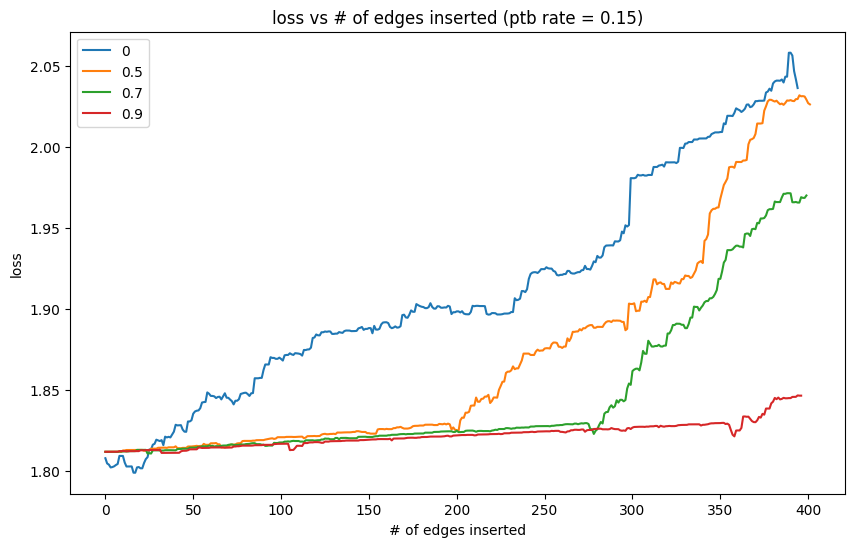

In [67]:


# split_dic2 = copy.copy(split_dic)

# for label, values in split_dic2.items():
#     for i in range(len(values)):
#         split_dic2[label][i] = - abs(values[i] - initial_loss)

plt.figure(figsize=(10, 6))

# Iterate over the dictionary and plot each list
for label, values in split_dic_decreasing_gradual.items():
    plt.plot(values, label=str(label))

plt.xlabel('# of edges inserted')
plt.ylabel('loss')
plt.title('loss vs # of edges inserted (ptb rate = 0.15)')
plt.legend()

plt.show()